In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Load the data
from uwv.config import CBS80072NED, CBS_OPENDATA_PROCESSED_DATA_DIR, OUTPUT_DIR

cbs = pd.read_parquet(CBS_OPENDATA_PROCESSED_DATA_DIR / f"{CBS80072NED}.parquet")

2024-08-23 13:10:02.293 | INFO     | uwv.config:<module>:11 - PROJ_ROOT path is: C:\Users\c.hakker\OneDrive - VISTA college\Senior Stuff\Opleiding Data science\uwv


In [3]:
# Filter out rows where 'period_quarter_number' is 0
cbs = cbs[cbs['period_quarter_number'] != 0]

# Map quarters to months and create the 'date' column
cbs['month'] = cbs['period_quarter_number'].map({1: 1, 2: 4, 3: 7, 4: 10})
cbs['date'] = pd.to_datetime({'year': cbs['period_year'], 'month': cbs['month'], 'day': 1})

# Set this new 'date' column as the index
cbs.set_index('date', inplace=True)

In [4]:
# Filter data based on 'sbi_title'
sbi_code = 'T001081'  # Example: A-U Alle economische activiteiten
filtered_cbs = cbs[cbs['sbi'] == sbi_code]

# Filter the data to include only dates from 2016 to 2023
filtered_cbs = filtered_cbs.loc['2016-01-01':'2023-12-31']

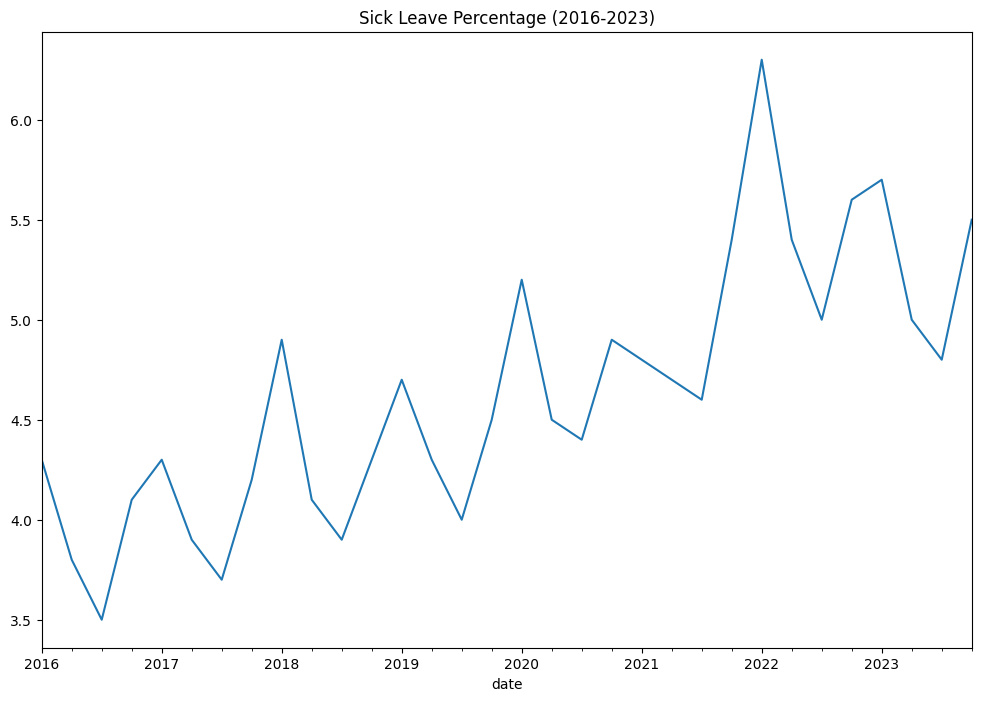

In [5]:
# Plotting the sick_leave_percentage
filtered_cbs['sick_leave_percentage'].plot(figsize=(12,8))
plt.title('Sick Leave Percentage (2016-2023)')
plt.show()

In [6]:
# Augmented Dickey-Fuller Test to check if the data is stationary
from statsmodels.tsa.stattools import adfuller

In [7]:
def adf_test(series, title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    
    labels = ['ADF test statistic', 'p-value', '# lags used', '# observations']
    out = pd.Series(result[0:4], index=labels)

    for key, val in result[4].items():
        out[f'critical value ({key})'] = val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [8]:
# Running ADF test on sick_leave_percentage
adf_test(filtered_cbs['sick_leave_percentage'], title='Sick Leave Percentage')

Augmented Dickey-Fuller Test: Sick Leave Percentage
ADF test statistic       1.369759
p-value                  0.996972
# lags used             10.000000
# observations          21.000000
critical value (1%)     -3.788386
critical value (5%)     -3.013098
critical value (10%)    -2.646397
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [9]:
# Granger Causality Test (if you have another series to compare with)
# Demonstrating with a hypothetical second series 'sbi_code' from `filtered_cbs`
# You should replace 'sbi_code' with the actual column name you'd like to test against

In [10]:
if 'sbi_code' in filtered_cbs.columns:
    from statsmodels.tsa.stattools import grangercausalitytests
    grangercausalitytests(filtered_cbs[['sick_leave_percentage', 'sbi_code']].dropna(), maxlag=3)

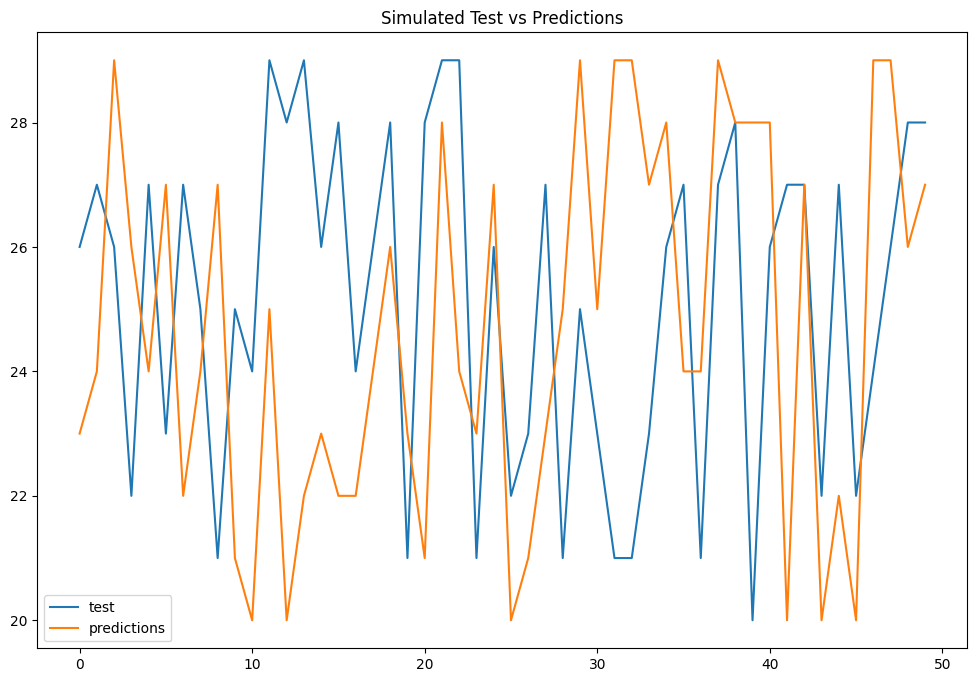

In [11]:
# Simulating and plotting a random series as was done in the original code
np.random.seed(42)
df_random = pd.DataFrame(np.random.randint(20, 30, (50, 2)), columns=['test', 'predictions'])
df_random.plot(figsize=(12,8))
plt.title('Simulated Test vs Predictions')
plt.show()

In [12]:
# Calculating RMSE between test and predictions
from statsmodels.tools.eval_measures import rmse

In [13]:
rmse_value = rmse(df_random['test'], df_random['predictions'])
print(f'RMSE between test and predictions: {rmse_value}')

RMSE between test and predictions: 4.125530268947253


In [14]:
# Resampling sick_leave_percentage to quarterly and plotting
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

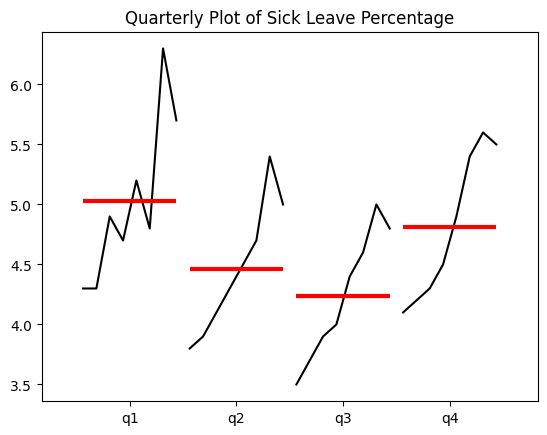

In [17]:
quarter_plot(filtered_cbs['sick_leave_percentage'].resample('QS').mean())
plt.title('Quarterly Plot of Sick Leave Percentage')
plt.show()